<a href="https://colab.research.google.com/github/tanahiro1004/python_repository/blob/main/number_recog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

data = datasets.load_digits()
images = data.data
labels = data.target
labels[0]

0

In [ ]:
d1,d2,ans1,ans2 = train_test_split(images,labels)
d1 = torch.tensor(d1, dtype=torch.float32)
ans1 = torch.tensor(ans1,dtype=torch.int64)
d2 = torch.tensor(d2,dtype=torch.float32)
ans2 = torch.tensor(ans2,dtype=torch.int64)

In [ ]:
from torch import nn

net = nn.Sequential(
    nn.Linear(64,32),
    nn.ReLU(),
    nn.Linear(32,16),
    nn.ReLU(),
    nn.Linear(16,10)
)

In [ ]:
from torch import optim

loss_fnc = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(),lr=0.01)

record_loss1 = []
record_loss2 = []

for i in range(1000):
  
  optimizer.zero_grad()

  y1 = net(d1)
  y2 = net(d2)

  loss1 = loss_fnc(y1,ans1)
  loss2 = loss_fnc(y2,ans2)
  record_loss1.append(loss1.item())
  record_loss2.append(loss2.item())

  loss1.backward()
  optimizer.step()

  if i%100 == 0:
    print(f"Epoch:{i:03} Loss1:{loss1.item():5g} Loss2:{loss2.item():5g}")

Epoch:000 Loss1:2.69331 Loss2:2.71563
Epoch:100 Loss1:1.1118 Loss2:1.1391
Epoch:200 Loss1:0.448146 Loss2:0.467475
Epoch:300 Loss1:0.262503 Loss2:0.297699
Epoch:400 Loss1:0.186044 Loss2:0.235816
Epoch:500 Loss1:0.144466 Loss2:0.205226
Epoch:600 Loss1:0.117829 Loss2:0.18656
Epoch:700 Loss1:0.0988202 Loss2:0.173596
Epoch:800 Loss1:0.0845349 Loss2:0.16419
Epoch:900 Loss1:0.0733465 Loss2:0.157164


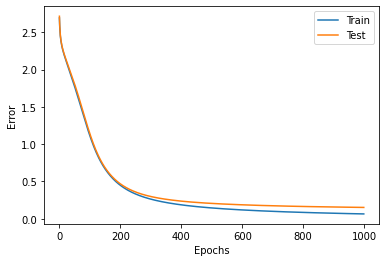

In [ ]:
plt.plot(range(len(record_loss1)), record_loss1, label="Train")
plt.plot(range(len(record_loss1)), record_loss2, label="Test")
plt.legend()

plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()

In [ ]:
y2 = net(d2)
count = (y2.argmax(1) == ans2).sum().item()
print(f"正解率：{count/len(y2)*100:5g} %")

正解率：95.3333 %


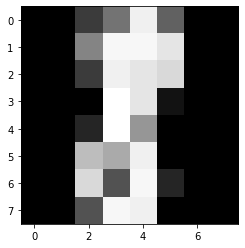

正解：8  nnの解答：8


In [ ]:
id = 122
x = images[id]
img = x.reshape(8,8)
plt.imshow(img, cmap="Greys_r")
plt.show()

x = torch.tensor(x, dtype=torch.float32)
y = net(x)
print(f"正解：{labels[id]}  nnの解答：{y.argmax().item()}")